In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [89]:
from datetime import datetime, timedelta

In [3]:
file_path = './resources/완_박스오피스_일별_2003-2022.csv'
mv_2003 = pd.read_csv(file_path)
print(mv_2003.columns)
mv_2003.head()

Index(['순위', '영화명', '개봉일', '등급', '장르', '대표국적', '국적', '제작사', '배급사', '감독', '배우 ',
       '기준일', '매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수'],
      dtype='object')


,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4


In [5]:
mv_2003.shape

(494385, 18)

In [6]:
mv_2003.isnull().sum()

순위            0
영화명           0
개봉일           0
등급         7347
장르          571
대표국적        129
국적          129
제작사      278391
배급사       18449
감독        15626
배우        42582
기준일           0
매출액           0
누적매출액         0
관객수           0
누적관객수         0
스크린수          0
상영횟수          0
dtype: int64

In [14]:
mv_2003.columns

Index(['순위', '영화명', '개봉일', '등급', '장르', '대표국적', '국적', '제작사', '배급사', '감독', '배우 ',
       '기준일', '매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수'],
      dtype='object')

In [15]:
# 배우 컬럼명 이상함.
# 선택하여 열 이름 변경하기
mv_2003.rename(columns={'배우 ':'배우'}, inplace=True)

In [16]:
mv_2003_v2 = mv_2003[:]
mv_2003_v2['등급'] = mv_2003_v2['등급'].fillna('무등급')
mv_2003_v2['장르'] = mv_2003_v2['장르'].fillna('무장르')
mv_2003_v2['대표국적'] = mv_2003_v2['대표국적'].fillna('무대표국적')
mv_2003_v2['국적'] = mv_2003_v2['국적'].fillna('무국적')
mv_2003_v2['제작사'] = mv_2003_v2['제작사'].fillna('무제작사')
mv_2003_v2['배급사'] = mv_2003_v2['배급사'].fillna('무배급사')
mv_2003_v2['감독'] = mv_2003_v2['감독'].fillna('무감독')
mv_2003_v2['배우'] = mv_2003_v2['배우'].fillna('무배우')
mv_2003_v2.isnull().sum()

순위       0
영화명      0
개봉일      0
등급       0
장르       0
대표국적     0
국적       0
제작사      0
배급사      0
감독       0
배우       0
기준일      0
매출액      0
누적매출액    0
관객수      0
누적관객수    0
스크린수     0
상영횟수     0
dtype: int64

In [17]:
mv_2003_v2.columns

Index(['순위', '영화명', '개봉일', '등급', '장르', '대표국적', '국적', '제작사', '배급사', '감독', '배우',
       '기준일', '매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수'],
      dtype='object')

In [18]:
mv_2003_v2['기준일'] = pd.to_datetime(mv_2003_v2['기준일'],format='%Y-%m-%d')
mv_2003_v2['개봉일'] = pd.to_datetime(mv_2003_v2['개봉일'],format='%Y-%m-%d')

In [30]:
# 누적 관객수 기준 sorting 
mv_NuJeok_sort = mv_2003_v2.sort_values(by=['누적관객수'])
mv_NuJeok_sort

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
5008,33,귀신이 산다,2004-09-17,12세관람가,"코미디,공포(호러),판타지",한국,한국,(주)시네마서비스,(주)시네마서비스,김상진,"김응수,장서희,차승원,김서현,최기웅,유대현,김성미,태인호,임상란,장승현,김정우,김양...",2004-09-11,-619500,-1095500,-99,-174,4,18
4969,30,귀신이 산다,2004-09-17,12세관람가,"코미디,공포(호러),판타지",한국,한국,(주)시네마서비스,(주)시네마서비스,김상진,"김응수,장서희,차승원,김서현,최기웅,유대현,김성미,태인호,임상란,장승현,김정우,김양...",2004-09-10,-384000,-476000,-61,-75,5,12
138919,68,밀레니엄 : 여자를 증오한 남자들,2012-01-11,청소년관람불가,"스릴러,드라마",미국,"미국,스웨덴,영국,독일",무제작사,한국소니픽쳐스릴리징브에나비스타영화㈜,데이빗 핀처,"다니엘 크레이그,루니 마라",2012-01-04,-272000,-272000,-34,-34,2,2
4947,37,귀신이 산다,2004-09-17,12세관람가,"코미디,공포(호러),판타지",한국,한국,(주)시네마서비스,(주)시네마서비스,김상진,"김응수,장서희,차승원,김서현,최기웅,유대현,김성미,태인호,임상란,장승현,김정우,김양...",2004-09-09,-92000,-92000,-14,-14,3,4
88747,72,날아라 펭귄,2009-09-24,전체관람가,드라마,한국,한국,국가인권위원회,스튜디오느림보,임순례,"문소리,최찬숙,박원상,손병호,최규환,박인규,박재현,조재윤,허예소,허예은,백승도,전혜...",2009-08-24,-6000,-6000,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477561,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-04,175000,135757593810,35,17615721,1,1
477649,49,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-05,225000,135757818810,45,17615766,1,1
477741,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-06,175000,135757993810,35,17615801,1,1
477796,53,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-07,215000,135758208810,43,17615844,1,1


In [20]:
mv_2003_v3 = mv_2003_v2.sort_values(by=['기준일','순위'])
mv_2003_v3

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,무제작사,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494329,87,디모: 벚꽃의 소리,2022-12-01,전체관람가,"애니메이션,뮤지컬,판타지",일본,일본,무제작사,(주)미디어캐슬,무감독,무배우,2022-12-31,8000,3092596,1,417,1,1
494330,87,화피사2: 요괴전쟁,2022-12-22,15세이상관람가,액션,중국,중국,무제작사,(유)조이앤시네마,무감독,무배우,2022-12-31,1000,220000,1,51,1,1
494317,100,나나,2022-12-15,15세이상관람가,드라마,인도네시아,인도네시아,무제작사,M&M 인터내셔널,무감독,무배우,2022-12-31,0,8896499,0,1026,1,1
494318,100,성덕,2022-09-28,12세이상관람가,다큐멘터리,한국,한국,해랑사,오드,오세연,오세연,2022-12-31,0,109161892,0,12565,1,1


In [29]:
mv_2003_v3.groupby(['영화명','개봉일'])['개봉일'].idxmax()

영화명            개봉일       
#살아있다          2020-06-24    402462
#아이엠히어         2021-01-14    425443
#위왓치유          2021-06-03    438600
#해시태그          2022-06-01    474835
...ing         2003-11-28        49
                              ...  
힘을 내요, 미스터 리   2019-09-11    373832
힘좋은 시아버지와 베란다  2019-06-03    366997
힙스터: 안개의 덫     2015-10-21    243045
힛쳐             2007-08-01     43253
ＡＶ여배우의 자취방     2017-05-01    294231
Name: 개봉일, Length: 21882, dtype: int64

In [26]:
# mv_2003_tp1 = mv_2003_v3.loc[mv_2003_v3.groupby(['영화명','개봉일'])['기준일'].idxmax()]
# mv_2003_tp1.head()

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
417479,29,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",2020-10-28,2890000,15968219900,289,1903992,2,2
428849,57,#아이엠히어,2021-01-14,12세이상관람가,"멜로/로맨스,코미디",프랑스,프랑스,무제작사,(주)넥스트엔터테인먼트월드(NEW),에릭 라티고,"알랭 샤바,배두나,이명자,선종남,김자금,강현중,정윤하,송경의,엄지만,남승화,이지민,...",2021-02-09,82000,136875710,11,16404,6,6
490334,51,#위왓치유,2021-06-03,청소년관람불가,다큐멘터리,기타,기타,무제작사,찬란,"바르보라 차르포바,비트 클루삭",무배우,2022-11-22,288000,16759950,48,1908,1,1
475316,37,#해시태그,2022-06-01,12세이상관람가,공연,한국,한국,(주)더존크리에이티브,(주)더존크리에이티브,이상식,무배우,2022-06-07,420500,2205600,35,173,8,8
289843,108,...ing,2003-11-28,12세관람가,"드라마,멜로/로맨스",한국,한국,드림맥스(주),(주)튜브엔터테인먼트,이언희,"임수정,김래원,이미숙,김지영,김현수,박혜연,장미,이성경,박소연,김순애,최덕문,김인문...",2017-03-19,5000,217487000,1,34308,1,1


In [27]:
mv_2003_v4 = mv_2003_v3.loc[mv_2003_v3.groupby(['영화명','개봉일'])['기준일'].idxmax()]
mv_2003_v4

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
417479,29,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",2020-10-28,2890000,15968219900,289,1903992,2,2
428849,57,#아이엠히어,2021-01-14,12세이상관람가,"멜로/로맨스,코미디",프랑스,프랑스,무제작사,(주)넥스트엔터테인먼트월드(NEW),에릭 라티고,"알랭 샤바,배두나,이명자,선종남,김자금,강현중,정윤하,송경의,엄지만,남승화,이지민,...",2021-02-09,82000,136875710,11,16404,6,6
490334,51,#위왓치유,2021-06-03,청소년관람불가,다큐멘터리,기타,기타,무제작사,찬란,"바르보라 차르포바,비트 클루삭",무배우,2022-11-22,288000,16759950,48,1908,1,1
475316,37,#해시태그,2022-06-01,12세이상관람가,공연,한국,한국,(주)더존크리에이티브,(주)더존크리에이티브,이상식,무배우,2022-06-07,420500,2205600,35,173,8,8
289843,108,...ing,2003-11-28,12세관람가,"드라마,멜로/로맨스",한국,한국,드림맥스(주),(주)튜브엔터테인먼트,이언희,"임수정,김래원,이미숙,김지영,김현수,박혜연,장미,이성경,박소연,김순애,최덕문,김인문...",2017-03-19,5000,217487000,1,34308,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387289,15,"힘을 내요, 미스터 리",2019-09-11,12세이상관람가,"코미디,드라마",한국,한국,"(주)용필름,(주)덱스터스튜디오",(주)넥스트엔터테인먼트월드(NEW),이계벽,"차승원,엄채영,박해준,김혜옥,안길강,전혜빈,류한비,조한철,성지루,김법래,정원중,신현...",2019-12-28,10950000,9930518906,1095,1181960,5,5
366997,75,힘좋은 시아버지와 베란다,2019-06-03,청소년관람불가,성인물(에로),일본,일본,무제작사,(주)도키엔터테인먼트,스즈키 켄지,무배우,2019-06-03,6000,6000,1,1,1,1
243045,99,힙스터: 안개의 덫,2015-10-21,청소년관람불가,"멜로/로맨스,드라마",한국,한국,(주)마부엔터테인먼트,고구마콘텐츠허브(주),강명진,"유사라,김동윤,정종우,류아진,박민규,강인화",2015-10-21,5000,5000,1,1,1,1
43879,59,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,무제작사,(주)씨지브이신도림,데이브 메이어스,"숀 빈,소피아 부시,자크리 나이튼,닐 맥도노프",2007-08-13,7000,153080000,1,23025,1,1


# 누적관객수 기준 mv_2003_v4 의 Sorting

In [52]:
mv_sorting_down = mv_2003_v4.sort_values(by=['누적관객수'], ascending=False)
mv_sorting_down_top10_up = mv_sorting_down[:10]
mv_sorting_down_top10_up
# mv_sorting_TOP10_down

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
493383,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2
403199,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1
427405,64,신과함께-죄와 벌,2017-12-20,12세이상관람가,"판타지,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",2021-01-26,45000,115727528087,9,14414658,5,5
493668,33,국제시장,2014-12-17,12세이상관람가,드라마,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",2022-12-23,576000,110947621230,96,14264478,2,2
399493,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,무제작사,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587
394448,35,겨울왕국 2,2019-11-21,전체관람가,애니메이션,미국,미국,무제작사,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1
379793,61,베테랑,2015-08-05,15세이상관람가,"액션,드라마",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10
335859,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
433877,95,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2021-03-29,10000,93672497700,2,12984701,1,1
401746,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5


In [ ]:
mv_sorting_down_top10_up

In [ ]:
# 명량은 총 상영기간이 171일

In [60]:
mv_2003_v3[mv_2003_v3['영화명'] == '명량']['기준일'].astype(str).to_list()

['2014-07-20',
 '2014-07-21',
 '2014-07-22',
 '2014-07-23',
 '2014-07-24',
 '2014-07-25',
 '2014-07-27',
 '2014-07-28',
 '2014-07-29',
 '2014-07-30',
 '2014-07-31',
 '2014-08-01',
 '2014-08-02',
 '2014-08-03',
 '2014-08-04',
 '2014-08-05',
 '2014-08-06',
 '2014-08-07',
 '2014-08-08',
 '2014-08-09',
 '2014-08-10',
 '2014-08-11',
 '2014-08-12',
 '2014-08-13',
 '2014-08-14',
 '2014-08-15',
 '2014-08-16',
 '2014-08-17',
 '2014-08-18',
 '2014-08-19',
 '2014-08-20',
 '2014-08-21',
 '2014-08-22',
 '2014-08-23',
 '2014-08-24',
 '2014-08-25',
 '2014-08-26',
 '2014-08-27',
 '2014-08-28',
 '2014-08-29',
 '2014-08-30',
 '2014-08-31',
 '2014-09-01',
 '2014-09-02',
 '2014-09-03',
 '2014-09-04',
 '2014-09-05',
 '2014-09-06',
 '2014-09-07',
 '2014-09-08',
 '2014-09-09',
 '2014-09-10',
 '2014-09-11',
 '2014-09-12',
 '2014-09-13',
 '2014-09-14',
 '2014-09-15',
 '2014-09-16',
 '2014-09-17',
 '2014-09-18',
 '2014-09-19',
 '2014-09-20',
 '2014-09-21',
 '2014-09-22',
 '2014-09-23',
 '2014-09-24',
 '2014-09-

## index 값 추출하기

In [ ]:
# index 값 추출하기
index_number = dataframe.index[(dataframe['code'] == '000100')]


print(dataframe.iloc[index_numer])
 
## 출력 결과 ##
# code : 000100
# open : 1000
# high : 1300
# low :
# close :
# pre_close :
# vix :




# 이상치 제거 예시

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12248\4095204386.py:16: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  np.percentile(df[(np.abs(stats.zscore(df)) < zscore_threshold).all(axis=1)].values.ravel(),\


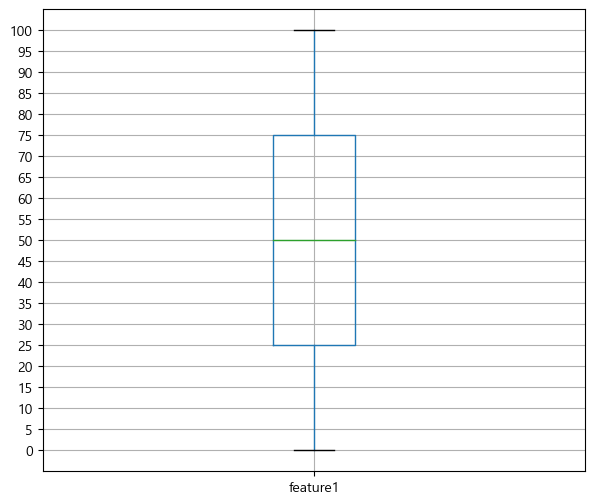

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 일정하게 0부터 100까지 총 101개 숫자를 만든다
xs = np.array(np.linspace(start=0, stop=100, num=101))
# xs = np.array([3,30,35,40,45,48,49,50,51,52,53,55,60,65,90,95])
df = pd.DataFrame(xs, columns=['feature1'])

from scipy import stats
zscore_threshold = 1.8 # zscore outliers 임계값
# outliers를 출력한다
df[(np.abs(stats.zscore(df)) > zscore_threshold).all(axis=1)].values.ravel()

# outliers제외하고 최소값, 백분위25, 백분위50, 백분위75, 최대값을 출력한다
np.percentile(df[(np.abs(stats.zscore(df)) < zscore_threshold).all(axis=1)].values.ravel(),\
              [0, 25, 50, 75, 100], interpolation='nearest')

plt.figure(figsize=(7, 6)) # 크기 지정
boxplot = df.boxplot(column=['feature1'])
plt.yticks(np.arange(0, 101, step=5))
plt.show()

In [36]:


import numpy as np

import pandas as pd



import matplotlib.pyplot as plt

import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]

%matplotlib inline

In [37]:
# loading 'tips' dataset

tips = sns.load_dataset('tips')



tips.shape

(244, 7)



tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
tips.groupby(['sex', 'day']).size()

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
dtype: int64

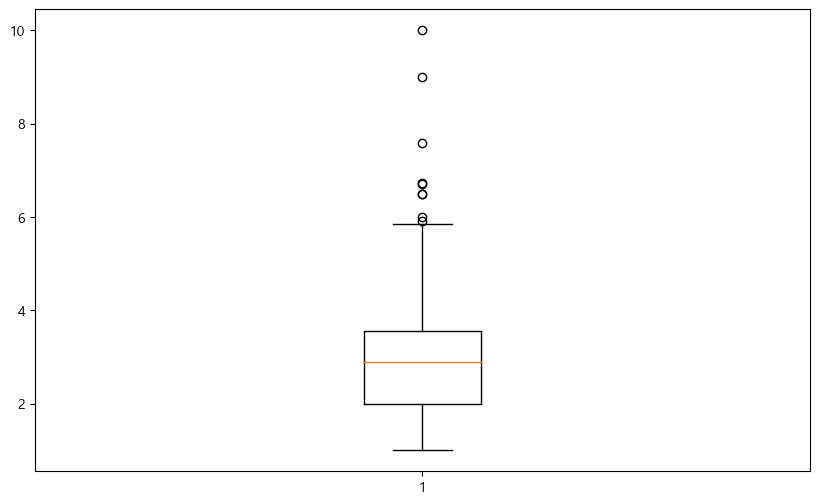

In [39]:

# Basic box plot

plt.boxplot(tips['tip'])

plt.show()

# 이상치 제거

In [114]:
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

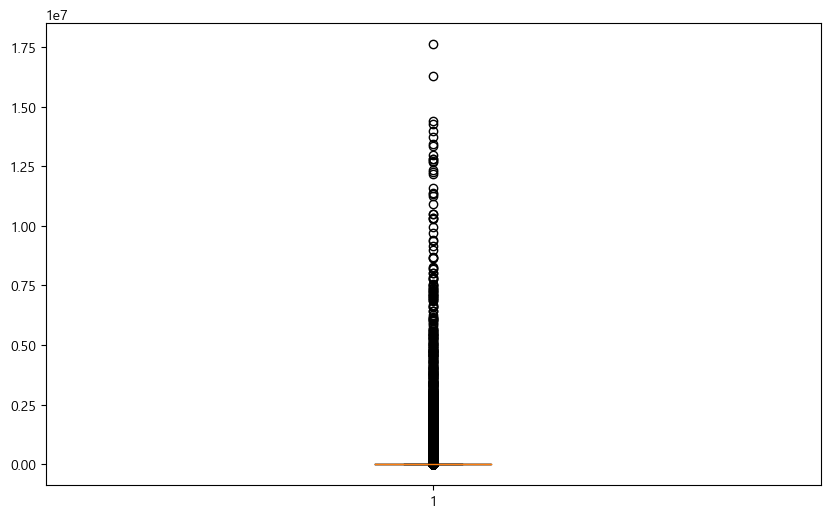

In [40]:
plt.boxplot(mv_2003_v4['누적관객수'])
plt.show()

# 2. 본격적으로 코딩 |  42일 까지의 누적매출액 추이 알아보기

> 42일 까지의 누적매출액 추이 알아보기

In [75]:
mv_2003_v3.to_csv('./resources/완_ordered_2003-2022_v1.csv', index=False)

In [62]:
mv_2003_v3.shape

(494385, 18)

In [74]:
mv03_gp = mv_2003_v3.groupby(['영화명', '개봉일','기준일'])['누적매출액'].count().to_frame()
mv03_gp

누적매출액
영화명        개봉일        기준일              
#살아있다      2020-06-24 2020-06-02      1
                      2020-06-03      1
                      2020-06-15      1
                      2020-06-19      1
                      2020-06-23      1
...                                 ...
힛쳐         2007-08-01 2007-08-10      1
                      2007-08-11      1
                      2007-08-12      1
                      2007-08-13      1
ＡＶ여배우의 자취방 2017-05-01 2017-05-01      1

[494385 rows x 1 columns]

In [76]:
mv03_gp.index

MultiIndex([(     '#살아있다', '2020-06-24', '2020-06-02'),
            (     '#살아있다', '2020-06-24', '2020-06-03'),
            (     '#살아있다', '2020-06-24', '2020-06-15'),
            (     '#살아있다', '2020-06-24', '2020-06-19'),
            (     '#살아있다', '2020-06-24', '2020-06-23'),
            (     '#살아있다', '2020-06-24', '2020-06-24'),
            (     '#살아있다', '2020-06-24', '2020-06-25'),
            (     '#살아있다', '2020-06-24', '2020-06-26'),
            (     '#살아있다', '2020-06-24', '2020-06-27'),
            (     '#살아있다', '2020-06-24', '2020-06-28'),
            ...
            (        '힛쳐', '2007-08-01', '2007-08-04'),
            (        '힛쳐', '2007-08-01', '2007-08-05'),
            (        '힛쳐', '2007-08-01', '2007-08-06'),
            (        '힛쳐', '2007-08-01', '2007-08-07'),
            (        '힛쳐', '2007-08-01', '2007-08-08'),
            (        '힛쳐', '2007-08-01', '2007-08-10'),
            (        '힛쳐', '2007-08-01', '2007-08-11'),
            (        '힛쳐', '2007

In [77]:
mv_2003_v3.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                14,     12,
            ...
            494324, 494325, 494326, 494327, 494328, 494329, 494330, 494317,
            494318, 494319],
           dtype='int64', length=494385)

In [78]:
mv03_gp_v2 = mv_2003_v3.groupby(['영화명', '개봉일', '기준일']).apply(lambda x: x.index.tolist()).to_frame(name='인덱스')
mv03_gp_v2

인덱스
영화명        개봉일        기준일                 
#살아있다      2020-06-24 2020-06-02  [402462]
                      2020-06-03  [402587]
                      2020-06-15  [403883]
                      2020-06-19  [404300]
                      2020-06-23  [404731]
...                                    ...
힛쳐         2007-08-01 2007-08-10   [43707]
                      2007-08-11   [43779]
                      2007-08-12   [43823]
                      2007-08-13   [43879]
ＡＶ여배우의 자취방 2017-05-01 2017-05-01  [294231]

[494385 rows x 1 columns]

In [80]:
mv03_gp_v3 = mv_2003_v3.groupby(['영화명', '개봉일', '기준일']).apply(lambda x: x.index.tolist()[0]).to_frame(name='인덱스')
mv03_gp_v3

인덱스
영화명        개봉일        기준일               
#살아있다      2020-06-24 2020-06-02  402462
                      2020-06-03  402587
                      2020-06-15  403883
                      2020-06-19  404300
                      2020-06-23  404731
...                                  ...
힛쳐         2007-08-01 2007-08-10   43707
                      2007-08-11   43779
                      2007-08-12   43823
                      2007-08-13   43879
ＡＶ여배우의 자취방 2017-05-01 2017-05-01  294231

[494385 rows x 1 columns]

In [ ]:
mv_2003_v3.

In [87]:
mv03_gp_v3.index

MultiIndex([(     '#살아있다', '2020-06-24', '2020-06-02'),
            (     '#살아있다', '2020-06-24', '2020-06-03'),
            (     '#살아있다', '2020-06-24', '2020-06-15'),
            (     '#살아있다', '2020-06-24', '2020-06-19'),
            (     '#살아있다', '2020-06-24', '2020-06-23'),
            (     '#살아있다', '2020-06-24', '2020-06-24'),
            (     '#살아있다', '2020-06-24', '2020-06-25'),
            (     '#살아있다', '2020-06-24', '2020-06-26'),
            (     '#살아있다', '2020-06-24', '2020-06-27'),
            (     '#살아있다', '2020-06-24', '2020-06-28'),
            ...
            (        '힛쳐', '2007-08-01', '2007-08-04'),
            (        '힛쳐', '2007-08-01', '2007-08-05'),
            (        '힛쳐', '2007-08-01', '2007-08-06'),
            (        '힛쳐', '2007-08-01', '2007-08-07'),
            (        '힛쳐', '2007-08-01', '2007-08-08'),
            (        '힛쳐', '2007-08-01', '2007-08-10'),
            (        '힛쳐', '2007-08-01', '2007-08-11'),
            (        '힛쳐', '2007

In [85]:
mv03_gp_v4 = mv03_gp_v3[:]
mv03_gp_v4.reset_index().set_index('영화명',inplace=True)
mv03_gp_v4
# mv03_gp_v4 = mv03_gp_v4[mv03_gp_v4['개봉일']-mv03_gp_v3['기준일'] <= 42 ]
# mv03_gp_v4

인덱스
영화명        개봉일        기준일               
#살아있다      2020-06-24 2020-06-02  402462
                      2020-06-03  402587
                      2020-06-15  403883
                      2020-06-19  404300
                      2020-06-23  404731
...                                  ...
힛쳐         2007-08-01 2007-08-10   43707
                      2007-08-11   43779
                      2007-08-12   43823
                      2007-08-13   43879
ＡＶ여배우의 자취방 2017-05-01 2017-05-01  294231

[494385 rows x 1 columns]

In [88]:
mv03_gp_v5 = mv03_gp_v3.reset_index().set_index('영화명')[['개봉일', '기준일', '인덱스']]
mv03_gp_v5

,개봉일,기준일,인덱스
영화명,,,
#살아있다,2020-06-24,2020-06-02,402462
#살아있다,2020-06-24,2020-06-03,402587
#살아있다,2020-06-24,2020-06-15,403883
#살아있다,2020-06-24,2020-06-19,404300
#살아있다,2020-06-24,2020-06-23,404731
...,...,...,...
힛쳐,2007-08-01,2007-08-10,43707
힛쳐,2007-08-01,2007-08-11,43779
힛쳐,2007-08-01,2007-08-12,43823


In [92]:
print(type(mv03_gp_v5['기준일'][0]))
print(type(mv03_gp_v5['개봉일'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [100]:
boolean_1 = ((mv03_gp_v5['기준일']-mv03_gp_v5['개봉일'] <= timedelta(days=42)) & (mv03_gp_v5['기준일']-mv03_gp_v5['개봉일'] >= timedelta(days=0)))
mv03_gp_v6 = mv03_gp_v5[boolean_1]
mv03_gp_v6

,개봉일,기준일,인덱스
영화명,,,
#살아있다,2020-06-24,2020-06-24,404856
#살아있다,2020-06-24,2020-06-25,404953
#살아있다,2020-06-24,2020-06-26,405059
#살아있다,2020-06-24,2020-06-27,405162
#살아있다,2020-06-24,2020-06-28,405278
...,...,...,...
힛쳐,2007-08-01,2007-08-10,43707
힛쳐,2007-08-01,2007-08-11,43779
힛쳐,2007-08-01,2007-08-12,43823


In [108]:
mv03_gp_v7 = mv03_gp_v6.groupby(['영화명','개봉일'])['인덱스'].max().reset_index(name='인덱스')
mv03_gp_v7

,영화명,개봉일,인덱스
0,#살아있다,2020-06-24,409934
1,#아이엠히어,2021-01-14,428849
2,#위왓치유,2021-06-03,443927
3,#해시태그,2022-06-01,475316
4,...ing,2003-11-28,422
...,...,...,...
20265,"힘을 내요, 미스터 리",2019-09-11,379810
20266,힘좋은 시아버지와 베란다,2019-06-03,366997
20267,힙스터: 안개의 덫,2015-10-21,243045
20268,힛쳐,2007-08-01,43879


In [110]:
mv03_gp_v7['인덱스']

0        409934
1        428849
2        443927
3        475316
4           422
          ...  
20265    379810
20266    366997
20267    243045
20268     43879
20269    294231
Name: 인덱스, Length: 20270, dtype: int64

# 3. 영화 하나씩 추출(42일되는 누적관객수)

In [112]:
mv_NuJeok_p = mv_2003_v3.iloc[mv03_gp_v7['인덱스']]
mv_NuJeok_p

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
409851,132,국도극장: 감독판,2020-05-29,12세이상관람가,드라마,한국,한국,명필름랩,명필름랩,전지희,"이동휘,이한위,신신애,이상희,김서하,서현우,임성재,강태우,윤영민,임도윤,김현,정규수...",2020-08-05,0,8633500,0,1034,1,1
428885,18,캐롤,2016-02-04,청소년관람불가,드라마,미국,"미국,영국",무제작사,CGV아트하우스,토드 헤인즈,"케이트 블란쳇,루니 마라,카일 챈들러,제이크 레이시,사라 폴슨",2021-02-09,1799900,2886874565,192,350604,51,59
443964,44,라 트라비아타,2018-03-04,12세이상관람가,공연,독일,독일,무제작사,(주)케빈앤컴퍼니,프랑코 제피렐리,플라시도 도밍고,2021-07-07,655500,29187200,31,1967,6,6
475285,65,아사코,2019-03-14,12세이상관람가,드라마,일본,일본,무제작사,(주)이수C&E,하마구치 류스케,"히가시데 마사히로,카라타 에리카",2022-06-07,26000,137534619,3,15982,1,1
427,2,해피 에로 크리스마스,2003-12-17,15세관람가,드라마,한국,한국,(주)튜브엔터테인먼트,(주)튜브엔터테인먼트,이건동,"김선아,차태현,박영규,김지영,송윤희,조미영,홍성규,조상렬,신영운,박윤미,최창우,김현...",2003-12-18,34986000,94838000,5705,14978,10,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379758,101,늙은 자전거,2015-11-12,전체관람가,"드라마,가족",한국,한국,"(주)영화사 북촌,대국미디어그룹,한국방송예술교육진흥원 ,영화사 키노(주)",주식회사 마운틴픽쳐스,문희융,"최종원,박민상,박상면,조안,춘자,김형범,정아미",2019-10-23,6000,27542300,3,5882,1,2
367056,34,나의 히어로 아카데미아 더 무비: 두 명의 히어로,2019-05-16,전체관람가,애니메이션,일본,일본,무제작사,(주)리틀빅픽쳐스,나가사키 켄지,"야마시타 다이키,오카모토 노부히코,미야케 켄타,시다 미라이",2019-06-03,905380,155183120,106,18987,12,14
243039,106,미쓰 와이프,2015-08-13,15세이상관람가,코미디,한국,한국,"(주)영화사아이비젼,플러스엠 엔터테인먼트",플러스엠 엔터테인먼트,강효진,"엄정화,송승헌,김상호,라미란,서신애,임보경,강현구,백승호,정지안,조훈휘,최윤철,유영...",2015-10-21,0,7361509869,0,983383,1,1
43915,21,판타스틱4,2005-08-11,무등급,"액션,SF,판타지",미국,미국,"마블 엔터테인먼트,이십세기폭스필름코퍼레이션",이십세기폭스코리아(주),팀 스토리,"제시카 알바,줄리안 맥마흔",2007-08-13,923000,3520155000,159,563905,5,26


> 42일 기준 누적관객수 box plot

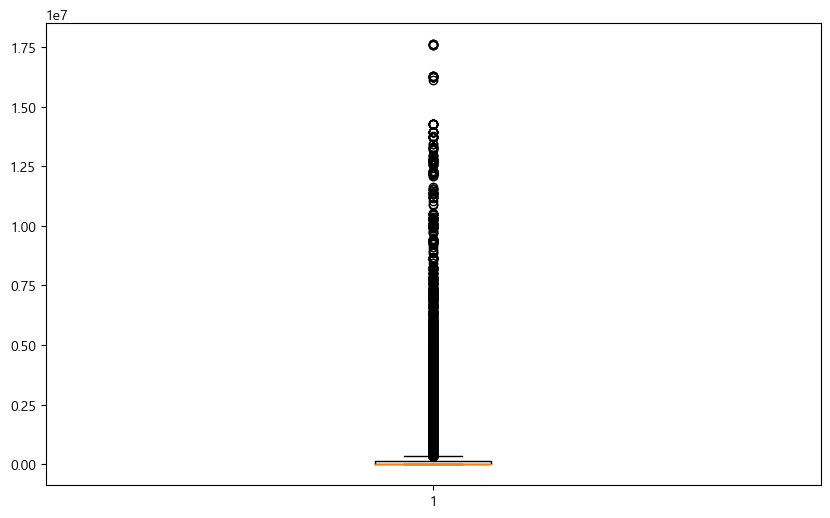

In [113]:
plt.boxplot(mv_NuJeok_p['누적관객수'])
plt.show()

In [116]:
mv_NuJeok_p_v2 = mv_NuJeok_p[:]
remove_out(mv_NuJeok_p_v2,['누적관객수'])

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,132,국도극장: 감독판,2020-05-29,12세이상관람가,드라마,한국,한국,명필름랩,명필름랩,전지희,"이동휘,이한위,신신애,이상희,김서하,서현우,임성재,강태우,윤영민,임도윤,김현,정규수...",2020-08-05,0,8633500,0,1034,1,1
1,18,캐롤,2016-02-04,청소년관람불가,드라마,미국,"미국,영국",무제작사,CGV아트하우스,토드 헤인즈,"케이트 블란쳇,루니 마라,카일 챈들러,제이크 레이시,사라 폴슨",2021-02-09,1799900,2886874565,192,350604,51,59
2,44,라 트라비아타,2018-03-04,12세이상관람가,공연,독일,독일,무제작사,(주)케빈앤컴퍼니,프랑코 제피렐리,플라시도 도밍고,2021-07-07,655500,29187200,31,1967,6,6
3,65,아사코,2019-03-14,12세이상관람가,드라마,일본,일본,무제작사,(주)이수C&E,하마구치 류스케,"히가시데 마사히로,카라타 에리카",2022-06-07,26000,137534619,3,15982,1,1
4,2,해피 에로 크리스마스,2003-12-17,15세관람가,드라마,한국,한국,(주)튜브엔터테인먼트,(주)튜브엔터테인먼트,이건동,"김선아,차태현,박영규,김지영,송윤희,조미영,홍성규,조상렬,신영운,박윤미,최창우,김현...",2003-12-18,34986000,94838000,5705,14978,10,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17228,55,프라미싱 영 우먼,2021-02-24,15세이상관람가,"범죄,스릴러,드라마",미국,미국,무제작사,유니버설픽쳐스인터내셔널 코리아(유),에머랄드 펜넬,"캐리 멀리건,보 번햄,알리슨 브리,레버른 콕스,클랜시 브라운,제니퍼 쿨리지",2021-03-18,226000,50703300,24,6335,7,7
17229,24,길위에서,2013-05-23,전체관람가,다큐멘터리,한국,한국,(주)비트윈픽처스,㈜영화사 백두대간,이창재,무배우,2013-08-08,2594000,277163500,367,40209,9,12
17230,101,늙은 자전거,2015-11-12,전체관람가,"드라마,가족",한국,한국,"(주)영화사 북촌,대국미디어그룹,한국방송예술교육진흥원 ,영화사 키노(주)",주식회사 마운틴픽쳐스,문희융,"최종원,박민상,박상면,조안,춘자,김형범,정아미",2019-10-23,6000,27542300,3,5882,1,2
17231,34,나의 히어로 아카데미아 더 무비: 두 명의 히어로,2019-05-16,전체관람가,애니메이션,일본,일본,무제작사,(주)리틀빅픽쳐스,나가사키 켄지,"야마시타 다이키,오카모토 노부히코,미야케 켄타,시다 미라이",2019-06-03,905380,155183120,106,18987,12,14


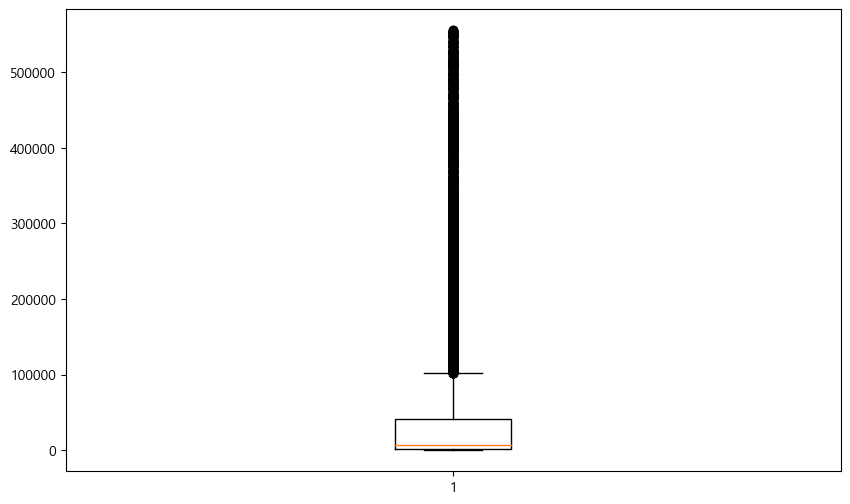

In [119]:
plt.boxplot(remove_out(mv_NuJeok_p_v2,['누적관객수'])['누적관객수'])
plt.show()

In [10]:
mv_2018_ver4.to_csv('./resources/완_기간별_dropna_180101_to_230509_ver4.csv', index=False)

In [11]:
mv_2018_ver4.to_excel('./resources/완_기간별_dropna_180101_to_230509_ver4.xlsx', index=False)